# Simple Data Analysis and Linear Regression Modelling

## The `housing` problem

We want to predict average house values in suburbs of Boston.

Accesible en https://archive.ics.uci.edu/ml/datasets/Housing

### Attribute Information:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in \$1000's

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import sklearn as skl
import seaborn as sns

from sklearn.datasets import load_boston

## Carga de datos

In [3]:
boston_data = load_boston()

df_housing = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
df_housing['MEDV'] = boston_data['target']

print ("nFilas: %d\tnColumnas: %d\n" % (df_housing.shape[0], df_housing.shape[1]) )
print ("Columnas:\t", np.array(df_housing.columns))

nFilas: 506	nColumnas: 14

Columnas:	 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


## Descripción, visualización y correlaciones

### Análisis descriptivo.

In [4]:
df_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Boxplots and histograms

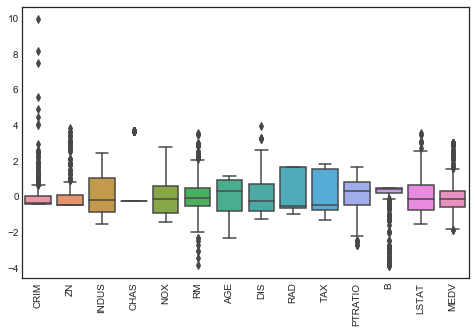

In [5]:
#normalizamos para tener rangos uniformes en histogramas
df_housing_normalizado = (df_housing - df_housing.mean()) / df_housing.std() 

plt.figure( figsize=(8, 5))
sns.set_style("white")
bx_plot = sns.boxplot(data=df_housing_normalizado)
#bx_plot = sns.boxplot(data=df_housing)
plt.xticks(rotation=90)
plt.show()

### Histograms and scatterplots

Plot histograms of groups of 5 variables plus target.

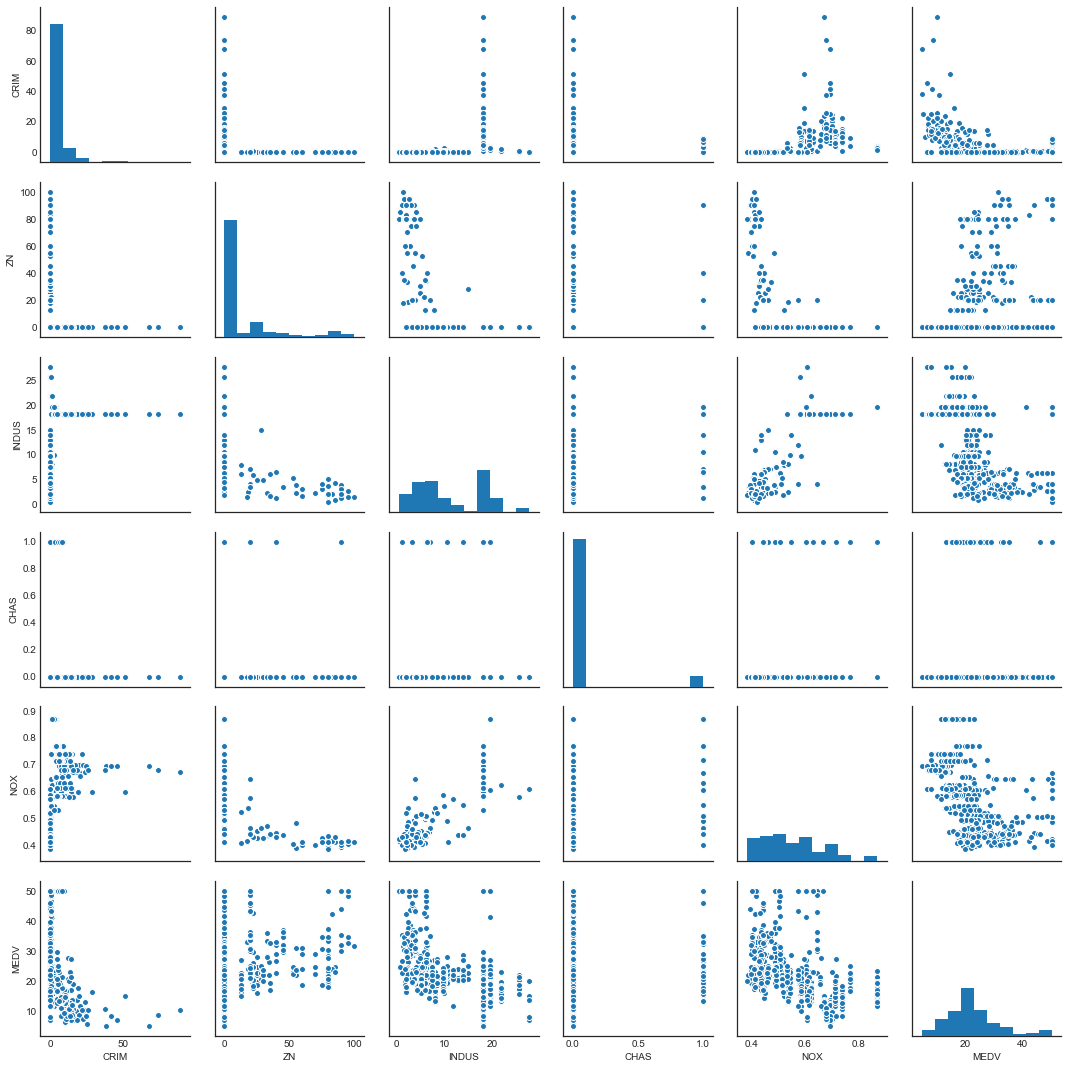

In [ ]:
vars_housing   = df_housing.columns[ : -1]
target_housing = df_housing.columns[-1]

pair_plot = sns.pairplot( df_housing[ list(vars_housing[ : 5]) + [target_housing] ] )
plt.show()

In [ ]:
pair_plot = sns.pairplot( df_housing[ list(vars_housing[ 5: 10]) + [target_housing] ] )
plt.show()

In [ ]:
pair_plot = sns.pairplot( df_housing[ list(vars_housing[ 10: ]) + [target_housing] ] )
plt.show()

### Correlations

In [ ]:
df_housing.corr().round(decimals=3)

In [ ]:
# correlation heatmap
plt.figure( figsize=(10, 8))
plt.title('housing correlations')
_ = sns.heatmap(df_housing.corr().values, vmin=-1., vmax=1., cmap='bwr', 
                xticklabels=list(df_housing.columns),
                yticklabels=list(df_housing.columns))

In [ ]:
print( ( df_housing.corr()['MEDV'].abs().sort_values(ascending=False).T) )

## Ridge Regression

Just getting started ...

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

lr_m =  Ridge()

std_sc = StandardScaler()
x = std_sc.fit_transform( df_housing[ vars_housing ].values )
y = df_housing[ target_housing ].values

#ajuste sobre la muestra completa, sin split train-test
lr_m.fit(x, y)

print("b: %f" % lr_m.intercept_)

nticks = len(lr_m.coef_)
plt.xticks(range(len(vars_housing)), vars_housing, rotation=45)
plt.title('Linear Regression coefs')
_ = plt.plot(lr_m.coef_, '-', lr_m.coef_, 'r*')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = lr_m.predict(x)

print("MAE: %.3f\t\tR^2: %.3f" % (mean_absolute_error(y, y_pred), lr_m.score(x, y)))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

We get a more realistic evaluation through Cross Validation.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 10
kf = KFold(n_folds, shuffle=True)

scores = cross_val_score(lr_m, x, y, scoring="neg_mean_absolute_error", cv=kf)

print("mae_mean: %.3f\t\tmae_std: %.3f" % (-scores.mean(), scores.std()))

### Finding the optimal `alpha` by CV

 We select the ridge parameter `alpha` by CV

In [ ]:
# select alpha in ridge regression by CV
# First iteration to find alpha
from sklearn.model_selection import GridSearchCV

n_folds = 10

# no shuffle 
kf = KFold(n_folds, shuffle=True)

l_alpha = [2.**k for k in range(-6, 10)]
param_grid = {'alpha': l_alpha}


lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m, param_grid=param_grid, cv=kf, 
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=2, verbose=1)

ridge_alpha_search.fit(x, y)

In [ ]:
#dir(ridge_alpha_search)

print('alfa = %.2f' % (ridge_alpha_search.best_params_['alpha']))
print('best_cv_mae = %.3f' % (-ridge_alpha_search.best_score_))

plt.xticks(range(len(l_alpha)), l_alpha, rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

In [ ]:
#Segunda iteración: recentramos alpha y refinamos la búsqueda
kf = KFold(n_folds, shuffle=True)

l_alpha = [32. * 2.**(k/2.) for k in range(-5, 4)]
param_grid = {'alpha': l_alpha}


lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m, param_grid=param_grid, cv=kf, 
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=2, verbose=1)

ridge_alpha_search .fit(x, y)

In [ ]:
print('alfa = %.2f' % (ridge_alpha_search.best_params_['alpha']))
print('best_cv_mae = %.3f' % (-ridge_alpha_search.best_score_))

plt.xticks(range(len(l_alpha)), np.round(l_alpha, 2), rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

### Testing the final model

We do it by CV.

In [ ]:
best_alpha = ridge_alpha_search.best_params_['alpha']
lr_m = Ridge(alpha=best_alpha)

scores = cross_val_score(lr_m, x, y, scoring="neg_mean_absolute_error", cv=kf)

print("mae_mean: %.3f\t\tmae_std: %.3f" % (-scores.mean(), scores.std()))

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred = np.clip( cross_val_predict(lr_m, x, y, cv=kf), 5., 50.)

In [ ]:
plt.figure( figsize=(8,6))

plt.title('Real vs CV Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_CV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

In [ ]:
err = y - y_pred

print("mae: %.3f" % (abs(err).mean()) )

plt.figure( figsize=(16,6))

plt.subplot(1,2,1)
plt.title("CV Error histogram")
plt.xlabel("Errs")
plt.ylabel("Err frequencies")
_ = plt.hist(err, bins=31)

plt.subplot(1,2,2)
plt.title("CV Error evolution")
plt.xlabel("MEDV")
plt.ylabel("Errs")
_ = plt.plot(y, err, '*', y, 0.*y, '-')

plt.show()